In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [9]:
dataset=pd.read_csv("student-por.csv")

In [10]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [12]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Text(0.5, 1.0, 'Correlation Heatmap')

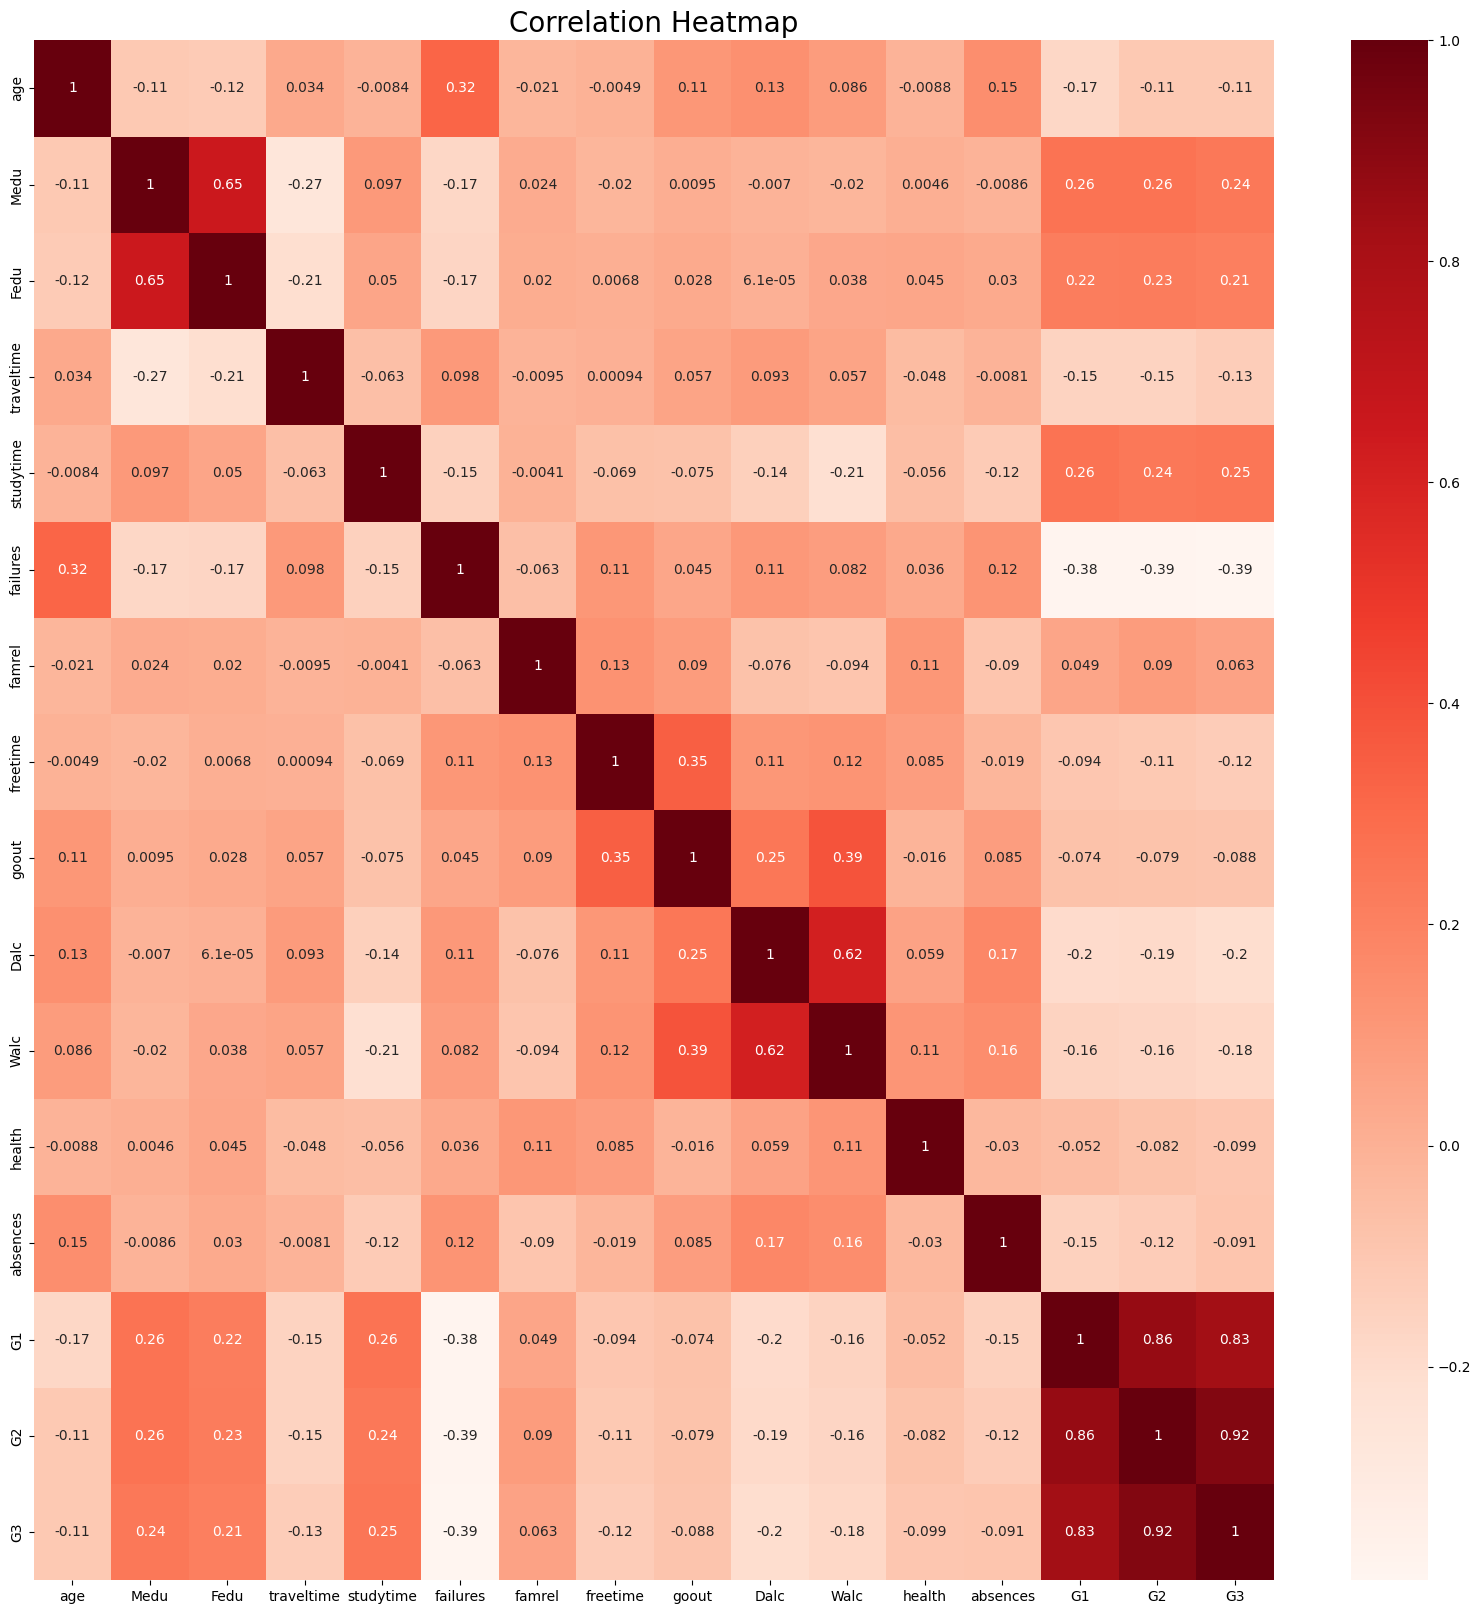

In [13]:
corr=dataset.corr(numeric_only=True)

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [14]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [15]:
required_columns=['sex','age','Medu','Fedu','Mjob', 'Fjob','traveltime', 'studytime','failures','paid','activities','higher','internet','romantic','freetime','goout','absences','G1','G2','G3']
data=dataset[required_columns]

In [16]:
data.replace({"yes": 1, "no": 0}, inplace=True)
data

/tmp/ipykernel_70834/476043897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"yes": 1, "no": 0}, inplace=True)


,sex,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,paid,activities,higher,internet,romantic,freetime,goout,absences,G1,G2,G3
0,F,18,4,4,at_home,teacher,2,2,0,0,0,1,0,0,3,4,4,0,11,11
1,F,17,1,1,at_home,other,1,2,0,0,0,1,1,0,3,3,2,9,11,11
2,F,15,1,1,at_home,other,1,2,0,0,0,1,1,0,3,2,6,12,13,12
3,F,15,4,2,health,services,1,3,0,0,1,1,1,1,2,2,0,14,14,14
4,F,16,3,3,other,other,1,2,0,0,0,1,0,0,3,2,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,2,3,services,other,1,3,1,0,1,1,1,0,4,2,4,10,11,10
645,F,18,3,1,teacher,services,1,2,0,0,0,1,1,0,3,4,4,15,15,16
646,F,18,1,1,other,other,2,2,0,0,1,1,0,0,1,1,6,11,12,9
647,M,17,3,1,services,services,2,1,0,0,0,1,1,0,4,5,6,10,10,10


In [17]:
data.isnull().sum()

sex           0
age           0
Medu          0
Fedu          0
Mjob          0
Fjob          0
traveltime    0
studytime     0
failures      0
paid          0
activities    0
higher        0
internet      0
romantic      0
freetime      0
goout         0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [18]:
data.isna().sum()

sex           0
age           0
Medu          0
Fedu          0
Mjob          0
Fjob          0
traveltime    0
studytime     0
failures      0
paid          0
activities    0
higher        0
internet      0
romantic      0
freetime      0
goout         0
absences      0
G1            0
G2            0
G3            0
dtype: int64

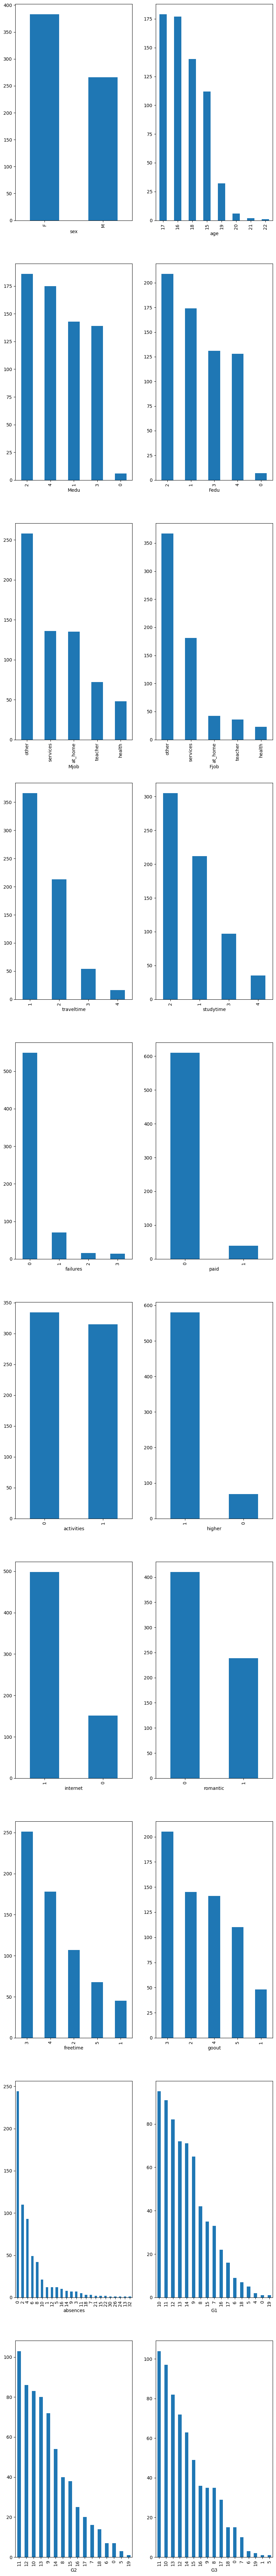

In [19]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 100))

for x in range(0, 10):
    for y in range(0, 2):
            
        data[required_columns[2*x + y]].value_counts().plot(kind='bar', ax = axes[x,y])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         649 non-null    object
 1   age         649 non-null    int64 
 2   Medu        649 non-null    int64 
 3   Fedu        649 non-null    int64 
 4   Mjob        649 non-null    object
 5   Fjob        649 non-null    object
 6   traveltime  649 non-null    int64 
 7   studytime   649 non-null    int64 
 8   failures    649 non-null    int64 
 9   paid        649 non-null    int64 
 10  activities  649 non-null    int64 
 11  higher      649 non-null    int64 
 12  internet    649 non-null    int64 
 13  romantic    649 non-null    int64 
 14  freetime    649 non-null    int64 
 15  goout       649 non-null    int64 
 16  absences    649 non-null    int64 
 17  G1          649 non-null    int64 
 18  G2          649 non-null    int64 
 19  G3          649 non-null    int64 
dtypes: int64(1

In [21]:
numeric_columns = data.select_dtypes(include=['int']).columns.tolist()
numeric_columns=numeric_columns
numeric_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'paid',
 'activities',
 'higher',
 'internet',
 'romantic',
 'freetime',
 'goout',
 'absences',
 'G1',
 'G2',
 'G3']

In [22]:
str_columns=[column for column in required_columns if column not in numeric_columns]
str_columns

['sex', 'Mjob', 'Fjob']

In [23]:
X=pd.get_dummies(data,columns=str_columns)

In [24]:
Y=X['G3']

In [25]:
X.drop(['G1','G2','G3'],axis=1,inplace=True)

In [47]:
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'freetime', 'goout',
       'absences', 'sex_F', 'sex_M', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
      dtype='object')

In [27]:
Y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2024)

In [49]:
X_train.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'freetime', 'goout',
       'absences', 'sex_F', 'sex_M', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
      dtype='object')

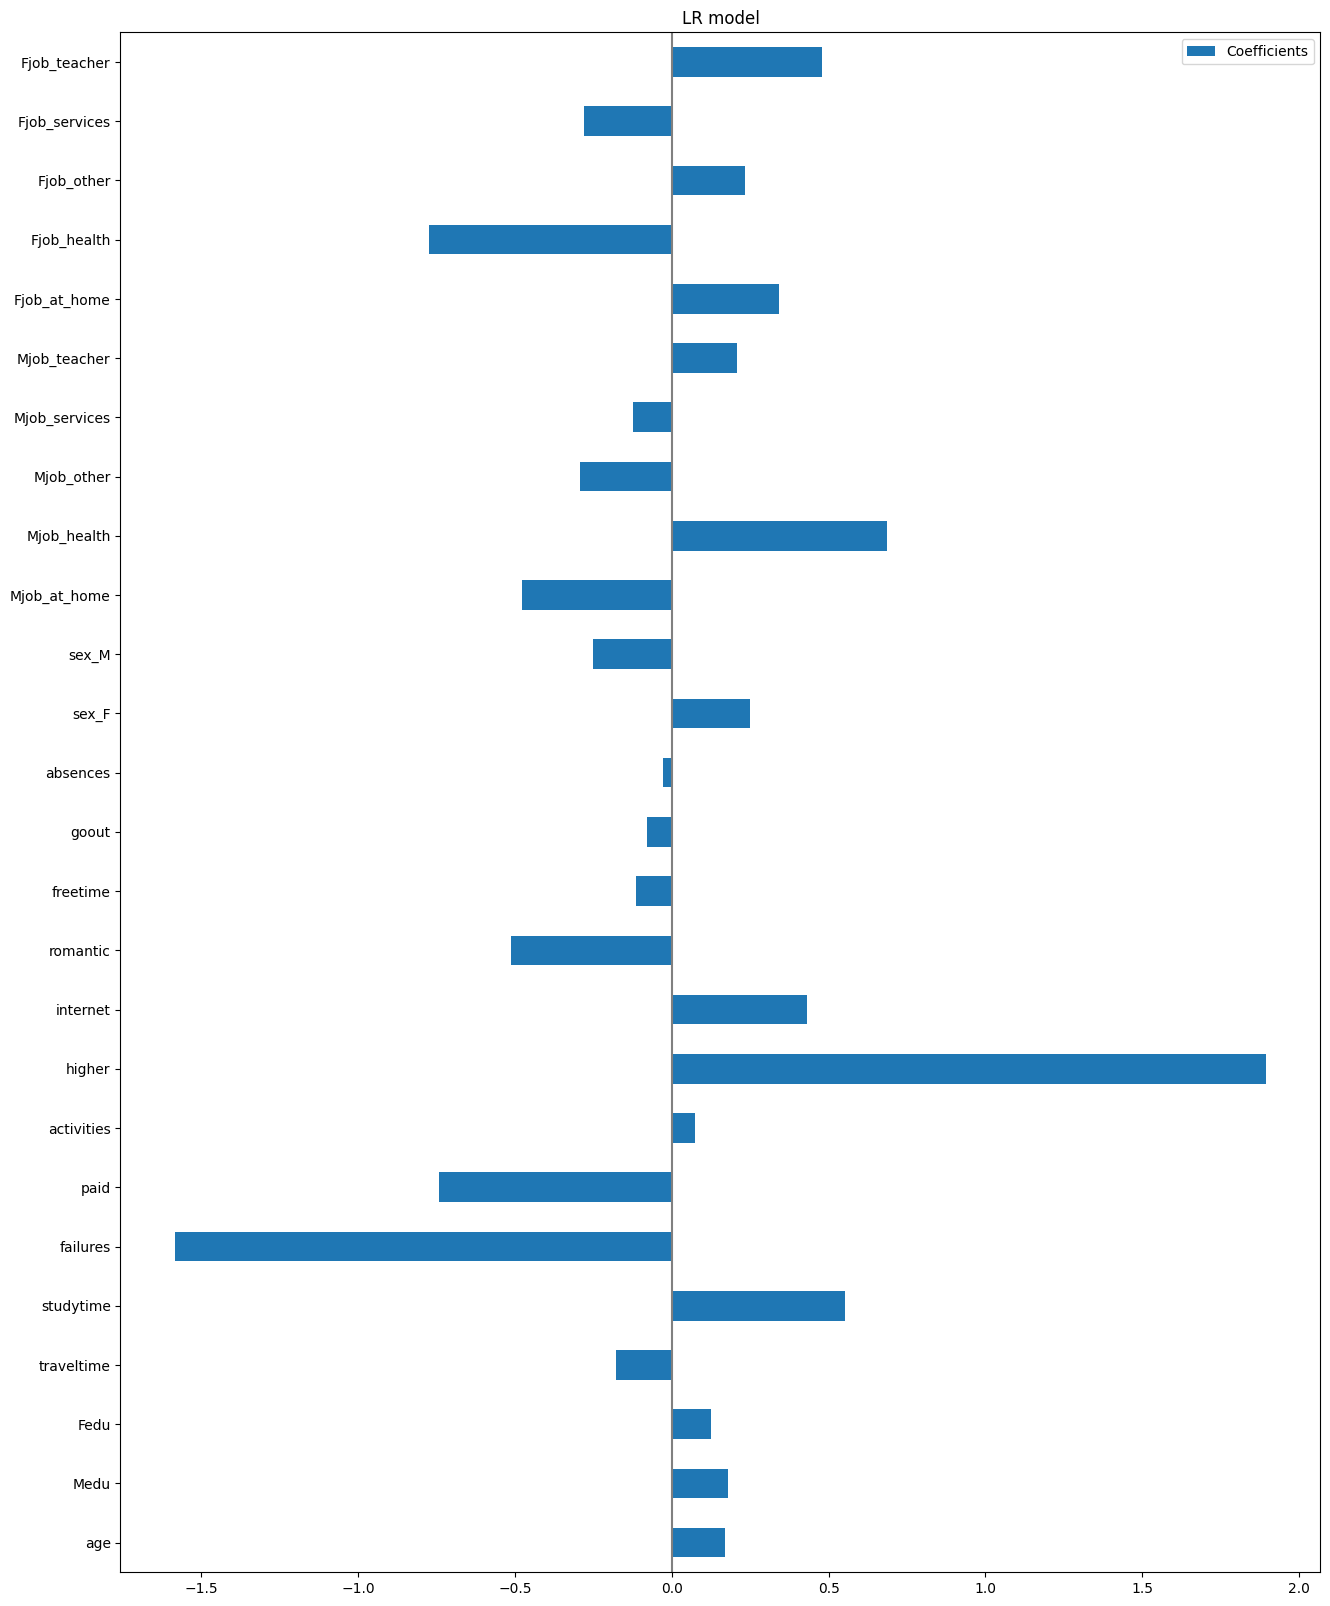

In [29]:
lr=LinearRegression()
lr.fit(X_train,y_train)
coefs = pd.DataFrame(
    lr.coef_, columns=["Coefficients"], index=X_train.columns
)
coefs.plot(kind="barh", figsize=(20, 20))
plt.title("LR model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [30]:
print(r2_score(y_train, lr.predict(X_train)))
print(mean_squared_error(y_train,lr.predict(X_train)))

0.2885939844870875
7.474795755438176


In [31]:
print(r2_score(y_test, lr.predict(X_test)))
print(mean_squared_error(y_test,lr.predict(X_test)))

0.291412116713481
7.138876175141767


In [32]:
GB=GradientBoostingRegressor(n_estimators=80,random_state=2024)
GB.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=80, random_state=2024)

In [33]:
print("R^2:", r2_score(y_test, GB.predict(X_test)))

R^2: 0.32596123634515983


In [34]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]

gs = GridSearchCV(GradientBoostingRegressor(), param_grid=grid,verbose = 1,cv=2, n_jobs=-1)

gs.fit(X_train, y_train)
gs.best_params_

Fitting 2 folds for each of 180 candidates, totalling 360 fits


{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.5}

In [35]:
print("R^2:", r2_score(y_test, gs.predict(X_test)))
print("MSE:", mean_squared_error(y_test,gs.predict(X_test)))

R^2: 0.29884044512346664
MSE: 7.064037304822372


In [36]:
gb_model=GradientBoostingRegressor(learning_rate = 0.01, max_depth=7, n_estimators = 100, subsample = 0.5)
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, subsample=0.5)

In [37]:
print("R^2:", r2_score(y_test, gb_model.predict(X_test)))
print("MSE:", mean_squared_error(y_test,gb_model.predict(X_test)))

R^2: 0.2830349030269764
MSE: 7.223274868107389


In [38]:
importances=gb_model.feature_importances_

In [39]:
feat_importances = {}

for i,features in zip(importances,X_train.columns):
    print("{}: {}".format(features,i))
    feat_importances[features] = i

age: 0.08674627556247347
Medu: 0.055241628530324216
Fedu: 0.0626300183253767
traveltime: 0.041422268200466905
studytime: 0.046619320206400076
failures: 0.18771078955227027
paid: 0.005211850561179013
activities: 0.0218916533056195
higher: 0.0424527532079219
internet: 0.01803116860112237
romantic: 0.024654680536816374
freetime: 0.06032726290575381
goout: 0.08110777157614447
absences: 0.11266839174042531
sex_F: 0.019867370070008127
sex_M: 0.011308379429245667
Mjob_at_home: 0.011153543741197874
Mjob_health: 0.009858504963751588
Mjob_other: 0.01733412548139112
Mjob_services: 0.015768473444594394
Mjob_teacher: 0.012398333027656288
Fjob_at_home: 0.006295404100081204
Fjob_health: 0.005539639522076944
Fjob_other: 0.01352259555666845
Fjob_services: 0.015625132955405154
Fjob_teacher: 0.014612664895628997


In [40]:
feat_importances = dict(sorted(feat_importances.items(), key=lambda item: item[1]))
feat_importances

{'paid': 0.005211850561179013,
 'Fjob_health': 0.005539639522076944,
 'Fjob_at_home': 0.006295404100081204,
 'Mjob_health': 0.009858504963751588,
 'Mjob_at_home': 0.011153543741197874,
 'sex_M': 0.011308379429245667,
 'Mjob_teacher': 0.012398333027656288,
 'Fjob_other': 0.01352259555666845,
 'Fjob_teacher': 0.014612664895628997,
 'Fjob_services': 0.015625132955405154,
 'Mjob_services': 0.015768473444594394,
 'Mjob_other': 0.01733412548139112,
 'internet': 0.01803116860112237,
 'sex_F': 0.019867370070008127,
 'activities': 0.0218916533056195,
 'romantic': 0.024654680536816374,
 'traveltime': 0.041422268200466905,
 'higher': 0.0424527532079219,
 'studytime': 0.046619320206400076,
 'Medu': 0.055241628530324216,
 'freetime': 0.06032726290575381,
 'Fedu': 0.0626300183253767,
 'goout': 0.08110777157614447,
 'age': 0.08674627556247347,
 'absences': 0.11266839174042531,
 'failures': 0.18771078955227027}

In [1]:
plt.figure(figsize=(20,20))
plt.bar(range(len(feat_importances)), list(feat_importances.values()), align='center')
plt.xticks(range(len(feat_importances)), list(feat_importances.keys()),  rotation=60, fontsize = 12)
plt.title("Feature Importance")
plt.savefig('graph.png')
plt.show()

NameError: name 'plt' is not defined

In [42]:
changing_columns=['internet','romantic','paid','activities','studytime','freetime','traveltime','goout','absences']
binary_columns=['internet','romantic','paid','activities']
ranged_columns=[column for column in changing_columns if column not in binary_columns]
def predict_changes(df,g3):
    model=gb_model
    df_copy=df.copy()
    pos_changes=[]
    for column in changing_columns:
        df_copy=df
        pos_changes=[]
        if(column in binary_columns):
            if df_copy.at[0,column]==1:
                df_copy.at[0,column]=0
                predicted_g3=model.predict(df)[0]
                if(predicted_g3<g3):
                    pos_changes.append(column+"_inv")
            else:
                df_copy.at[0,column]=1
                predicted_g3=model.predict(df)[0]
                if(predicted_g3<g3):
                    pos_changes.append(column)
        else:
            df_copy.at[0,column]+=1
            predicted_g3=model.predict(df)[0]
            if(predicted_g3<g3):
                pos_changes.append(column)
            else:
                pos_changes.append(column+"_inv")
    return pos_changes                    

In [43]:
sample_data=X_train.iloc[[0]].reset_index(drop=True)
sample_data

,age,Medu,Fedu,traveltime,studytime,failures,paid,activities,higher,internet,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,18,1,1,3,2,2,0,1,1,0,...,False,False,True,False,False,False,False,True,False,False


In [44]:
print(predict_changes(sample_data,Y.iloc[0]))

['absences']


In [45]:
changing_columns=['internet','romantic','paid','activities','studytime','freetime','traveltime','goout','absences']
binary_columns=['internet','romantic','paid','activities']
def predict_changes(df,g3):
    model=gb_model
    df_copy=df.copy()
    pos_changes=[]
    for column in changing_columns:
        df_copy=df
        pos_changes=[]
        if column in binary_columns:
            if df_copy.at[0,column]==1:
                df_copy.at[0,column]=0
                predicted_g3=model.predict(df_copy)[0]
                print(f"Predicted g3 for {column}_inv: {predicted_g3}")
                if(predicted_g3>g3):
                    pos_changes.append(column+"_inv")
            else:
                df_copy.at[0,column]=1
                predicted_g3=model.predict(df_copy)[0]
                print(f"Predicted g3 for {column}: {predicted_g3}")
                if(predicted_g3>g3):
                    pos_changes.append(column)

    pos_changes+=[column for column in changing_columns if column not in binary_columns]
    return pos_changes

In [46]:
import pickle

with open('my_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)